# Exploring the Bike-Sharing Systems (San Fransico Bay Area vs Chicago) - 2021
## by Folasade Adeyanju

## Introduction

> Bike-sharing system is a shared micromobility service for short term bike rental. The service can be free of charge (e.g., paid by a city) or offered for a price. There are around 2000 bike-sharing services available around the world, mostly based in cities. <br>
> The Datasets includes information about individual rides made in a bike-sharing system in the year 2021 covering the greater San Francisco Bay area and Chicago. <br>
> The Bike-sharing system in San Francisco Bay Area is `Ford-Go Bike` later renamed `Bay Wheels` while that of Chicago is `Divvy`. <br>
> The data used in this project was downloaded programmatically from Bay Wheels and Divvy websites. <br>
> There are 13 columns in the datasets. Both datasets have identical variable names and descriptions.
> There are about 2,035,163 records in the `Bay Wheels` and 5,595,063 records in the `Divvy` dataset

> The columns in the `Bay Wheels` and `Divvy` dataset include;  
    >- ride_id - This is the identifier for each ride
    >- rideable_type - This represents the rented bike type.
    >- started_at - This represents start time and date of the bike trip.
    >- ended_at - This represents end time and date of the bike trip.
    >- start_station_name - This represents the station identification number of where the bike is boarded.
    >- start_station_id - This represents the station identification number of where the bike is boarded.
    >- end_station_name - This represents the station identification number of where the bike is docked.
    >- end_station_id - This represents the station identification number of where the bike is docked.
    >- start_lat - Latitude co-ordinates of the station where the bike was boarded
    >- start_lng - Latitude co-ordinates of the station where the bike was boarded
    >- end_lat - Latitude co-ordinates of the station where the bike was doked
    >- end_lng - Longitude co-ordinates of the station where the bike was docked
    >- member_casual (This represents the type of customer = 'Member (i.e., a subscriber)' or 'casual
    

## Preliminary Wrangling

This document explores two datasets containing bike trip information over a period of 12 months for the year 2021.


##### Data Gathering.
> Here I will be importing the data programmatically from the system data repositories of both bike-sharing systems. <br>
> The code below downloads the zipped csv files into a folder <br>
> The downloaded files are then unzipped and loaded into a dataframe. <br>
> We will be having two dataframes; one for `Bay Wheels` and another for `Divvy` which will be merged later after data has been cleaned.

In [1]:
import requests
import os
import glob

# Creating new folders and downloading the zipped files
folder_names = ['fordgobike_tripdata', 'divvy_tripdata']

for folder in folder_names:
    if not os.path.exists(folder):
        os.makedirs(folder)


all_files = ['https://s3.amazonaws.com/baywheels-data/202101-baywheels-tripdata.csv.zip', 
             'https://s3.amazonaws.com/baywheels-data/202102-baywheels-tripdata.csv.zip', 
             'https://s3.amazonaws.com/baywheels-data/202103-baywheels-tripdata.csv.zip', 
             'https://s3.amazonaws.com/baywheels-data/202104-baywheels-tripdata.csv.zip', 
             'https://s3.amazonaws.com/baywheels-data/202105-baywheels-tripdata.csv.zip', 
             'https://s3.amazonaws.com/baywheels-data/202106-baywheels-tripdata.csv.zip', 
             'https://s3.amazonaws.com/baywheels-data/202107-baywheels-tripdata.csv.zip', 
             'https://s3.amazonaws.com/baywheels-data/202108-baywheels-tripdata.csv.zip',
             'https://s3.amazonaws.com/baywheels-data/202109-baywheels-tripdata.csv.zip',
             'https://s3.amazonaws.com/baywheels-data/202110-baywheels-tripdata.csv.zip',
             'https://s3.amazonaws.com/baywheels-data/202111-baywheels-tripdata.csv.zip',
             'https://s3.amazonaws.com/baywheels-data/202112-baywheels-tripdata.csv.zip',
             'https://divvy-tripdata.s3.amazonaws.com/202101-divvy-tripdata.zip',
             'https://divvy-tripdata.s3.amazonaws.com/202102-divvy-tripdata.zip',
             'https://divvy-tripdata.s3.amazonaws.com/202103-divvy-tripdata.zip',
             'https://divvy-tripdata.s3.amazonaws.com/202104-divvy-tripdata.zip',
             'https://divvy-tripdata.s3.amazonaws.com/202105-divvy-tripdata.zip',
             'https://divvy-tripdata.s3.amazonaws.com/202106-divvy-tripdata.zip',
             'https://divvy-tripdata.s3.amazonaws.com/202107-divvy-tripdata.zip',
             'https://divvy-tripdata.s3.amazonaws.com/202108-divvy-tripdata.zip',
             'https://divvy-tripdata.s3.amazonaws.com/202109-divvy-tripdata.zip',
             'https://divvy-tripdata.s3.amazonaws.com/202110-divvy-tripdata.zip',
             'https://divvy-tripdata.s3.amazonaws.com/202111-divvy-tripdata.zip',
             'https://divvy-tripdata.s3.amazonaws.com/202112-divvy-tripdata.zip']

for url in all_files[:12]:
        with open(os.path.join(folder_names[0], url.split('/')[-1]), mode = 'wb') as file:
            response = requests.get(url)
            file.write(response.content)
            print('Download Complete')
            
for url in all_files[12:]:
        with open(os.path.join(folder_names[1], url.split('/')[-1]), mode = 'wb') as file:
            response = requests.get(url)
            file.write(response.content)
            print('Download Complete')


Download Complete
Download Complete
Download Complete
Download Complete
Download Complete
Download Complete
Download Complete
Download Complete
Download Complete
Download Complete
Download Complete
Download Complete
Download Complete
Download Complete
Download Complete
Download Complete
Download Complete
Download Complete
Download Complete
Download Complete
Download Complete
Download Complete
Download Complete
Download Complete


In [2]:
import zipfile, os

#unzipping the compressed files in each folder
directory = [r'C:\\Users\\folayanju\\Documents\\ALX-T Data Analyst\\Data Visualization\\PROJECT 3\\project-template\\Project\\divvy_tripdata']

for dirs in directory:
    os.chdir(dirs)

for file in os.listdir(dirs):
    if zipfile.is_zipfile(file):
        with zipfile.ZipFile(file) as item:
            item.extractall()


path = [r'C:\\Users\\folayanju\\Documents\\ALX-T Data Analyst\\Data Visualization\\PROJECT 3\\project-template\\Project\\fordgobike_tripdata']


for paths in path:
    os.chdir(paths)
    
for file in os.listdir(paths):
    if zipfile.is_zipfile(file):
        with zipfile.ZipFile(file) as docs:
            docs.extractall()

In [3]:
import pandas as pd
import glob

# importing the .csv files into pandas dataframes
unzip_files = glob.glob(paths + '/*.csv')

cols = []

for filename in unzip_files:
    baywheels_df = pd.read_csv(filename, index_col = None, header = 0)
    cols.append(baywheels_df)
baywheels = pd.concat(cols, axis = 0, ignore_index = True)


unzip_file = glob.glob(dirs + '/*.csv')

colmns = []

for filenames in unzip_file:
    divvy_df = pd.read_csv(filenames, index_col = None, header = 0)
    colmns.append(divvy_df)
divvy = pd.concat(colmns, axis = 0, ignore_index = True)


##### Gathering cont'd

The above blocks of code have downloaded datasets for both bike-sharing systems and have been loaded into two dataframes `baywheels` and `divvy`.

In [ ]:
baywheels.head(4)

In [ ]:
baywheels.shape

In [ ]:
baywheels.info(show_counts = True)

In [ ]:
divvy.head(4)

In [ ]:
divvy.shape

In [ ]:
divvy.info(show_counts = True)

### Data Cleaning

> We will go ahead and clean up the dataset to ensure structural integrity and to tidy up the data.

> Visual and Programmatic assessments of the datasets reveal the following data quality issues.

> `baywheels` and `divvy`
    >- Missing records for specific columns
    >- Incorrect datatypes;
        >- start time and end times to be converted to datetime
    >- Null/Mising values

> We would be cleaning one dataset at a time.

#### cleaning `baywheels`:

In [4]:
baywheels_copy = baywheels.copy()
divvy_copy = divvy.copy()

Now, we have created copies of the original datasets to be cleaned so the original dataset is available for reference purposes if need be.

#### Define:
>- Convert start and end times to datetime datatype.
>- remove unwanted columns (start_station_id, end_station_name and end_station_id)
>- fix null values in end_latitude and end_longitude

##### Code:

In [5]:
# converting start and end time to datetime datatype
baywheels_copy.started_at = pd.to_datetime(baywheels_copy.started_at)
baywheels_copy.ended_at = pd.to_datetime(baywheels_copy.ended_at)

In [ ]:
# checking for null values
baywheels_copy.end_station_name.isnull().sum().sum(), baywheels_copy.end_station_id.isnull().sum().sum()

In [ ]:
# checking for null values
baywheels_copy.start_station_name.isnull().sum().sum(), baywheels_copy.start_station_id.isnull().sum().sum()

Since we have the latitude and longitude co-ordinates for the station names, we will not be requiring the station id's, I will go ahead and drop the station id's, end_station_name and also drop the null values. I would be keeping the start station names because it would be required for analysis later.

In [7]:
#drop unwanted columns
baywheels_copy.drop(['start_station_id', 'end_station_id', 'end_station_name'], axis = 1, inplace = True)
baywheels_copy = baywheels_copy.dropna(subset = ['start_station_name']) 

In [ ]:
# checking for null values in the end latitude and end longitude columns
baywheels_copy.end_lat.isnull().sum().sum(), baywheels_copy.end_lng.isnull().sum().sum()

Although the null values in the end latitude and longitude as seen above are not many, I'll go ahead and check the data again because I really don't want to drop these records.

In [ ]:
baywheels_copy.query('end_lat != end_lat')

Upon checking the dataset, I have concluded to remove these points. This is because, in order to calculate the distance betweeen the start station and end station for each bike trips, I really need these values. They represent only 0.1% of the entire dataset so removing them should not introduce bias into the dataset

In [8]:
baywheels_copy = baywheels_copy.dropna(subset = ['end_lat'])

##### Test:

In [ ]:
baywheels_copy.info(show_counts = True)

In [ ]:
#checking for duplicate records
sum(baywheels_copy.duplicated())
#no duplicate records

###### Cleaning `baywheels` cont'd:

> The columns start time and end time have been converted to datetime datatype<br>
> Upon looking more closely at the dataset end_lat and end_long have missing values.<br>  
> I decided to drop the rows because the end_lat and end_long co-ordinates are required for me to calculate the distance between the end and start station names.

> The start_station_id, end_station_name and end_station_id columns will not be required for analysis.

#### Define:

Additional informations for `baywheels` dataset:
> For a more robust analysis of the baywheels dataset, I will be adding some new columns. They include;
    >- **duration_sec**: this will be calculated using the started at and ended_at columns
    >- **month**: this is will reference the existing start and end times column we already have to reflect the months only.
    >- **distance_km**: this will be calculated using the start and end latitudes and longitudes provided in the data
    >- **weekday**: this will represent the weekdays *Sunday - Saturday*
    >- **hour**: this will represent hours of the bike trips (24 hours).
    
Checking the dataset, I discovered that we have some trips that took 0seconds and travelled a distance of 0km. I also decided to look at any trips that were below 60 seconds in length; these could be potentially false starts or users trying to re-dock a bike to ensure it was secure.
  


#### Code:

In [9]:
import datetime as dt

In [10]:
# adding the duration in seconds between started_at and ended_at
baywheels_copy['duration_sec'] = baywheels_copy['started_at'] - baywheels_copy['ended_at']
baywheels_copy['duration_sec'] = abs(baywheels_copy['duration_sec'].dt.total_seconds())

In [11]:
# adding the month column
baywheels_copy['month'] = baywheels_copy['started_at'].dt.month_name().str[:3]

In [12]:
# adding the distance_km column
import numpy as np

def haversine_dist(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)


dist_km = []
for row in baywheels_copy.itertuples(index=False):
   dist_km.append(
       haversine_dist(row.start_lat, row.start_lng, row.end_lat, row.end_lng)
   )

baywheels_copy['distance_km'] = dist_km

In [13]:
#adding weekdays
baywheels_copy['weekday'] = baywheels_copy['started_at'].dt.strftime('%A')

In [14]:
# adding a column for hour

baywheels_copy['hour'] = baywheels_copy['started_at'].dt.hour

In [15]:
# removing trips below 60 seconds in length
baywheels_copy.drop(baywheels_copy[baywheels_copy.duration_sec < 60].index, inplace = True)

#### Test:

In [ ]:
baywheels_copy.query('duration_sec < 60')

In [ ]:
baywheels_copy.info(show_counts = True)

##### Data cleaning cont'd
Now that `Baywheels` data has been cleaned, we will go ahead and clean up the `Divvy` dataset

##### Cleaning `divvy`:

##### Define:

Similar to the cleaning actions performed in the `baywheels` dataset we would;
>- Convert start and end times to datetime datatype.
>- remove unwanted columns (start_station_id, end_station_name and end_station_id)
>- fix null values in end_latitude and end_longitude

#### Code:

In [ ]:
# checking for duplicates
sum(divvy_copy.duplicated())

In [16]:
# converting start and end time to datetime datatype
divvy_copy.started_at = pd.to_datetime(divvy_copy.started_at)
divvy_copy.ended_at = pd.to_datetime(divvy_copy.ended_at)

In [17]:
#drop unwanted columns
divvy_copy.drop(['start_station_id', 'end_station_name', 'end_station_id'], axis = 1, inplace = True)

In [18]:
divvy_copy = divvy_copy.dropna(subset = ['start_station_name']) 

As with the `baywheels` dataset, these columns would not be required; their longitude and latitudes have been provided and will be used to calculate the distance between the stations. The station_name column is kept because it is required for analysis and because of this, its null values will be dropped

In [ ]:
# checking for null values in the start and end latitude and  longitude columns
divvy_copy.end_lat.isnull().sum().sum(), divvy_copy.end_lng.isnull().sum().sum()

In [ ]:
divvy_copy.start_lat.isnull().sum().sum(), divvy_copy.start_lng.isnull().sum().sum()

There are some null values present in the end latitude and longitude. These missing values are very important to calculate distance between the two stations, I will have to also drop them here because there is no information available to use to fill these missing values. 

In [ ]:
# drop null values in end_lat and end_lng
divvy_copy = divvy_copy.dropna(subset = ['end_lat']) 

##### Test:

In [ ]:
divvy_copy.info(show_counts = True)

###### Cleaning `Divvy`:

Now that we have removed the unwanted columns and changed datatypes of start and end times. <br>

Null Records in the *end_lat* and *end_lng* column have been removed.

#### Define:

Additional informations for `divvy` dataset:
> For a more robust analysis of the fordgobike dataset, I will be adding some new columns to the dataset fordgobike. They include;
    >- **duration_sec**: this will be calculated in seconds from the start and end times
    >- **month**: this is will reference the existing start and end times column we already have to reflect the months only.
    >- **distance_km**: this will be calculated using the latitude and longitude co-ordinates of the stations
    >- **weekday**: this will represent the weekdays *Sunday - Saturday*
    >- **hour**: this will represent the hours in a day (1 to 24 hours)
    
Similar to the discovery in the baywheels dataset, trips with a duration of 0 seconds, distance of 0km and trips that lasted tor less than 60 seconds will be removed from this dataset because these could be potentially false starts, users trying to re-dock a bike to ensure it was secure or trips that are taken by staff as they service and inspect the system.


#### Code:

In [19]:
#creating duration in seconds column
divvy_copy['duration_sec'] = divvy_copy['ended_at'] - divvy_copy['started_at']
divvy_copy['duration_sec'] = abs(divvy_copy['duration_sec'].dt.total_seconds())

In [20]:
# creating the month column
divvy_copy['month'] = divvy_copy['started_at'].dt.month_name().str[:3]

In [21]:
#creating the weekday column
divvy_copy['weekday'] = divvy_copy['started_at'].dt.strftime('%A')

In [22]:
#creating the column for distance in km

distkm = []
for row in divvy_copy.itertuples(index=False):
   distkm.append(
       haversine_dist(row.start_lat, row.start_lng, row.end_lat, row.end_lng)
   )

divvy_copy['distance_km'] = distkm

In [23]:
# adding a column for hour

divvy_copy['hour'] = divvy_copy['started_at'].dt.hour

In [24]:
# removing trips below 60 seconds in length
divvy_copy.drop(divvy_copy[divvy_copy.duration_sec < 60].index, inplace = True)

### Test:

In [ ]:
divvy_copy.query('duration_sec < 60')

In [ ]:
divvy_copy.info(show_counts = True)

In [ ]:
baywheels_copy.describe()

In [ ]:
divvy_copy.describe()

#### Final Data Cleaning notes:
Now that we have two clean datasets `baywheels_copy` and `divvy_copy`.

It is worthy of note that we still have records with distance of 0km; these records are kept because there is a possibility that the users docked the bikes at the boarding station. The bikes must have been used within the same location.<br>


In [25]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [26]:
baywheels_clean = baywheels_copy.copy()
divvy_clean = divvy_copy.copy()

%store baywheels_clean
%store divvy_clean

Stored 'baywheels_clean' (DataFrame)
Stored 'divvy_clean' (DataFrame)


### What is the structure of your dataset?
-`baywheels`
> There are 1,560,535 records with 15 features (ride_id, rideable_type, started_at, ended_at, start_station_name, start_lat, start_lng, end_lat, end_lng, member_casual, duration_sec, month, distance_km, weekday, hour) in my first dataset `baywheels_clean` dataset which contains information for bike sharing company - **Fordgobike** later named **BayWheels** in the San Francisco Bay area. 7 of the variables are numeric, 6 are text and 2 are dates.

-`divvy`
> There are 4,834,703 records with 15 features (ride_id, rideable_type, started_at, ended_at, start_station_name, start_lat, start_lng, end_lat, end_lng, member_casual, duration_sec, month, distance_km, weekday, hour) in the second dataset `divvy_clean` which contains information for bike sharing company - **Divvy bikes** in Chicago. 7 of the variables are numeric, 6 are text and 2 are dates.

### What is/are the main feature(s) of interest in your dataset?
-`baywheels`
> I am interested in seeing what patterns determine a customer's likelihood to become a subscriber
> I am also interested in checking when customers take the most trips and if times and seasons could be a determining factor.
> I would like to see if there is a relationship between the distance of the bike trips and the type of customer i.e., if distance can help determine the kind of subs to profile to be members rather than casual customers.
> I also want to see if casual customers take more or less trips than members.

-`divvy`
>- Similar to my interests stated above for `baywheels` dataset, I would like to explore the same features in the `divvy` dataset. 

I would also like to do a comparison between the two different bike sharing companies I am evaluating in this project.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
-`baywheels` & `divvy`
> The additional data that I have been able to add to the dataset ('month', 'distance_km', 'weekday', 'distance_sec' and 'hour') will all play a huge role in helping me investigate the dataset further.
> the duration of the bike trips in seconds too, I believe there should be some relationship between the duration in seconds and the distance covered in km in each trip.
> user_type is also a very important feature that will help support my investigation in this dataset.


## Univariate Exploration


### Question
For the duration of the trips in seconds, is the data skewed or symmetric? Is it unimodal or bimodal?

##### Visualization

Since we have the duration of the trips available in seconds for both the `baywheels` and `divvy` dataset, we can look at these two side by side.<br>
For the `baywheels dataset` <br>
As shown in the first chart below, the majority of the dataset sits in smaller duration values, as a result, I will go ahead and plot on a log scale.<br>

For the `divvy dataset` <br>
Upon plotting the divvy dataset, I was not getting a good chart with a standard scale, because of this, I went back into the dataset and found that there are some trips that lasted for more than 24 hrs ie 86,400 secs. The longest trip lasted for about 39 days (3,356,649 secs), these really high datapoints were 1,333 records, In order to see how the duration is spread accross the datatset, I decided to remove these records.

In [ ]:
baywheels_clean.duration_sec.max()

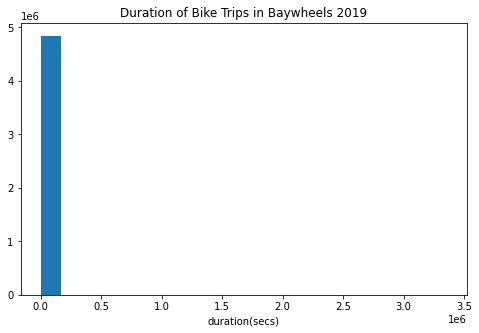

In [27]:
plt.figure(figsize=[8, 5])
plt.hist(data = divvy_clean, x = 'duration_sec', bins = 20)
plt.xlabel('duration(secs)')
plt.title('Duration of Bike Trips in Baywheels 2019')
plt.show();

The plot above does not show us the data distribution properly, this is because we have a few data points that have very high trip length. As a result, the plot is over stretched out hence not showing anything. <br>

As a result, I will remove these really highpoints by excluding points with trip length greater than 24 hours and also trip lengths less than 60 seconds

In [28]:
baywheels_dur = baywheels_clean.query('duration_sec < 86400 | duration_sec > 60')
divvy_dur = divvy_clean.query('duration_sec < 86400 | duration_sec > 60')

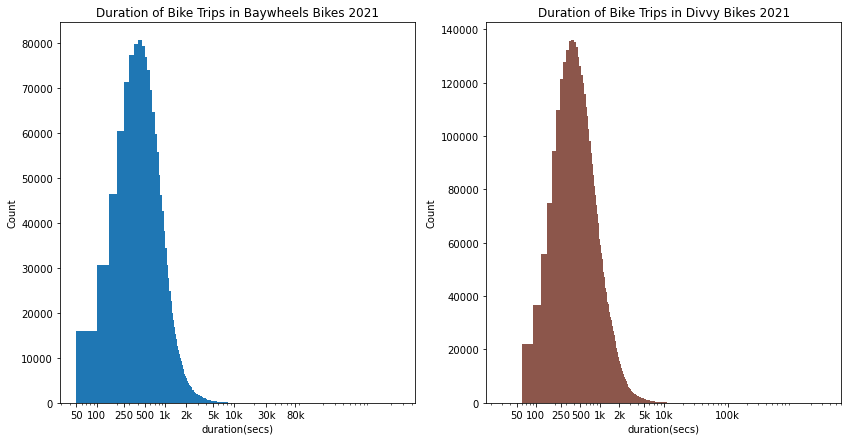

In [29]:
#the plot above does not tell us enough, now I will plot again on a log scale
plt.figure(figsize=[14, 7])

plt.subplot(1, 2, 1)
bins = np.arange(0, max(baywheels_dur['duration_sec']) + 50, 50)

plt.hist(data = baywheels_dur, x = 'duration_sec', bins = bins, color = sb.color_palette()[0])
plt.xlabel('duration(secs)')
plt.ylabel('Count')
plt.xscale('log')
plt.xticks([50, 100, 250, 500, 1e3, 2e3, 5e3, 1e4, 3e4, 8e4], 
           [50, 100, 250, 500, '1k', '2k', '5k', '10k', '30k', '80k' ])
plt.title('Duration of Bike Trips in Baywheels Bikes 2021');

plt.subplot(1, 2, 2)
bins = np.arange(0, max(divvy_dur['duration_sec']) + 30, 30)

plt.hist(data = divvy_dur, x = 'duration_sec', bins = bins, color = sb.color_palette()[5])
plt.xlabel('duration(secs)')
plt.ylabel('Count')
plt.xscale('log')
plt.xticks([50, 100, 250, 500, 1e3, 2e3, 5e3, 1e4, 1e5], 
           [50, 100, 250, 500, '1k', '2k', '5k', '10k', '100k'])
plt.title('Duration of Bike Trips in Divvy Bikes 2021');

##### Observation

The plot above shows a uniomdal distribution of the duration in seconds for both `Divvy` and `Baywheels` datasets. 
In `Baywheels` dataset we can see the highest peak between 300 and 500 seconds, a gradual trailing off of the data from the peak down to about 9,000 seconds.
Similarly `Divvy` dataset, the highest peaks like between 300 and 500 seconds and then a gradual trailing off of the data down to a bit over 10,000 seconds. `Divvy` dataset seem to have a slightly longer tail trail compared to the `Baywheels` dataset.

Next up is the distance of the trips from the start station to the end station in km

### Question
For the distance in km between start station snd end station, is the data skewed or symmetric? Is it unimodal or bimodal?

##### Visualization


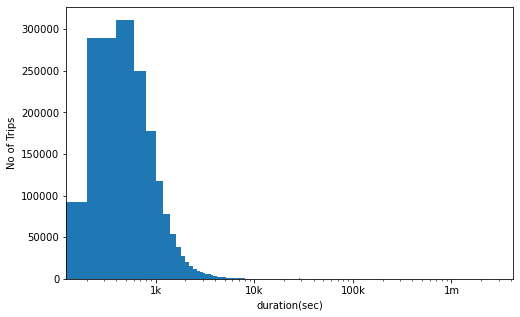

In [30]:
# Plotting the distribution of distance on a log scale
bins = np.arange(0, max(baywheels_clean['duration_sec']) + 200, 200)

plt.figure(figsize = [8, 5])
plt.hist(data = baywheels_clean, x = 'duration_sec', bins = bins)
plt.xlabel('duration(sec)')
plt.ylabel('No of Trips')
plt.xscale('log')
plt.xticks([1e3, 1e4, 1e5, 1e6], ['1k', '10k', '100k', '1m'])
plt.show();

After plotting the above, I realised I needed to explore this distribution on a much smaller log bin size. This is because more of the data is distribued at lower distances(km). As mentioned earlier, we can see the data points for the 0km trips. I will remove them when looking into the dataset below

I went ahead to look at the same data using log bin size of 0.1 and 0.05. With these sizes, I was able to have a better view at the peaks and spread.

In [31]:
baywheels_dist = baywheels_clean.query('distance_km > 0')
divvy_dist = divvy_clean.query('distance_km > 0')

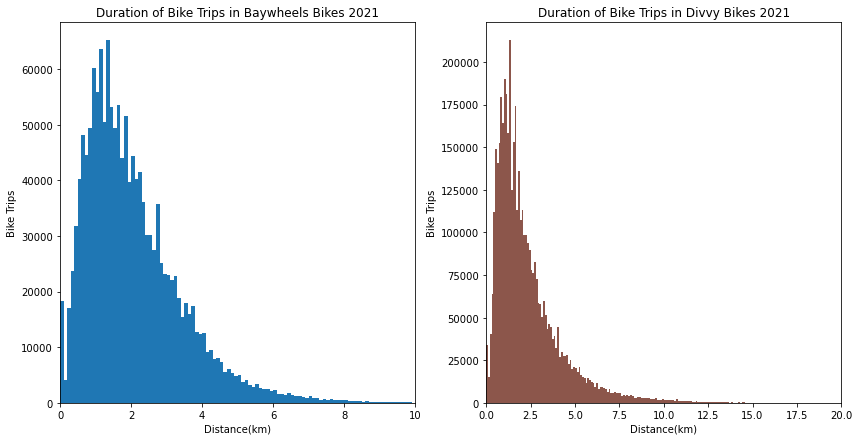

In [32]:
plt.figure(figsize=[14, 7])

bins = np.arange(0, 10, 0.1)
divvy_bins = np.arange(0, 20, 0.1)

plt.subplot(1, 2, 1)
plt.hist(data = baywheels_dist, x = 'distance_km', bins = bins, color = sb.color_palette()[0])
plt.xlabel('Distance(km)')
plt.ylabel('Bike Trips')
plt.xlim([0, 10])
plt.title('Duration of Bike Trips in Baywheels Bikes 2021');

plt.subplot(1, 2, 2)
plt.hist(data = divvy_dist, x = 'distance_km', bins = divvy_bins, color = sb.color_palette()[5])
plt.xlabel('Distance(km)')
plt.ylabel('Bike Trips')
plt.xlim([0, 20])
plt.title('Duration of Bike Trips in Divvy Bikes 2021');

#### Observation

Distance in km for both datasets when plotted on a log scale, looks skewed to the left. The distribution has the highest peak at between 1km and 1.5km. Most of the bike trips covered smaller distances.
However, the peak number of trips of bike trips in Divvy bike share is higher than that of Baywheels.

#### Question
What is the distribution of casual subscribers and subscribed members in both datasets? <br>
Do we have more casual customers or subscribed members?

#### Visualization
We will look at both Divvy Bikes and Baywheels datasets to answer this question.

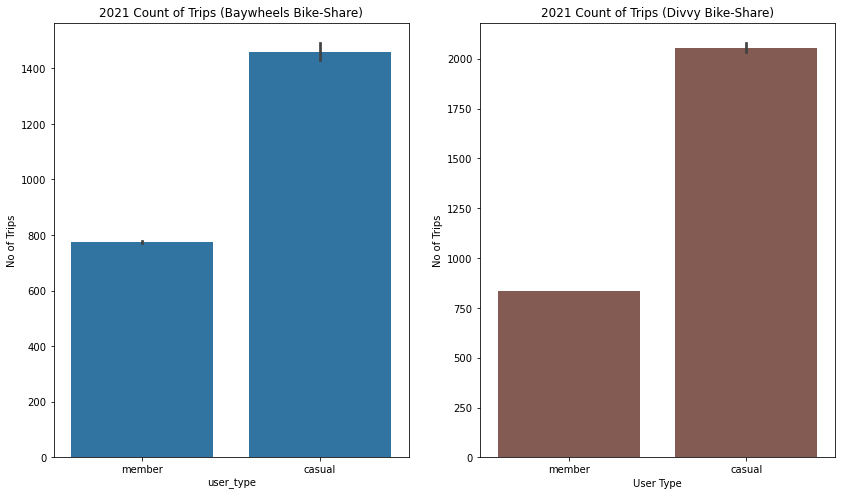

In [33]:
plt.figure(figsize = [14, 8])

plt.subplot(1, 2, 1)
sb.barplot(data = baywheels_clean, x = 'member_casual', y = 'duration_sec', 
           color = sb.color_palette()[0], order = ['member', 'casual'])
plt.xlabel('user_type')
plt.ylabel('No of Trips')
plt.title('2021 Count of Trips (Baywheels Bike-Share)');

plt.subplot(1, 2, 2)
sb.barplot(data = divvy_clean, x = 'member_casual', y = 'duration_sec',
           color = sb.color_palette()[5], order = ['member', 'casual'])
plt.xlabel('User Type')
plt.ylabel('No of Trips')
plt.title('2021 Count of Trips (Divvy Bike-Share)');

#### Observation
From the above chart we can see that we have more casual customers taking bike trips than the members (i.e., subscribed customers). This pattern is similar for both Baywheels of the San Francisco Bay Area and Divvy Bike share in Chicago.  
We can also see that we have a record of more trips in total in `Divvy` when compared with the `Baywheels` dataset.

This trend is sort of expected because my research on these areas showed that Chicago Area is more populated than the San Francisco Bay area.

#### Question

What is the distribution of bike type in both datasets

#### Visualization

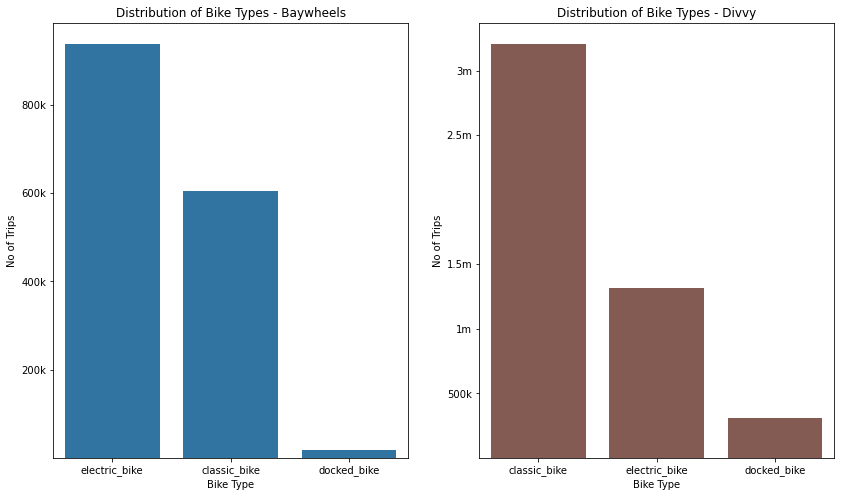

In [34]:
plt.figure(figsize = [14, 8])

plt.subplot(1, 2, 1)
order = baywheels_clean.rideable_type.value_counts().index
sb.countplot(data = baywheels_clean , x = 'rideable_type' , color = sb.color_palette()[0] , order = order)
plt.yticks([0.2e6, 0.4e6, 0.6e6, 0.8e6], ['200k', '400k', '600k', '800k'])
plt.xlabel('Bike Type')
plt.ylabel('No of Trips')
plt.title('Distribution of Bike Types - Baywheels');

plt.subplot(1, 2, 2)
order = divvy_clean.rideable_type.value_counts().index
sb.countplot(data = divvy_clean , x = 'rideable_type' , color = sb.color_palette()[5] , order = order)
plt.yticks([0.5e6, 1.0e6, 1.5e6, 2.5e6, 3.0e6], ['500k', '1m', '1.5m', '2.5m', '3m'])
plt.xlabel('Bike Type')
plt.ylabel('No of Trips')
plt.title('Distribution of Bike Types - Divvy');

#### Observation

We can see here that the electric bike type is the most used bike in the Baywheels bikeshare system. Most of the bike trips are embarked on using electric bikes followed by the classic bikes and then lastly the docked bike. However, in comparison to this trend, we can clearly see that in Divvy bikeshare system, the classic bikes are the mostly used bikes followed by the electric and docked bikes. One clear thing is that the docked bikes are the least used bikes in both bike sharing system

#### Question
When are the most trips taken?

#### Visualization
Here we would look at when the most trips are taken by weekday and by months.

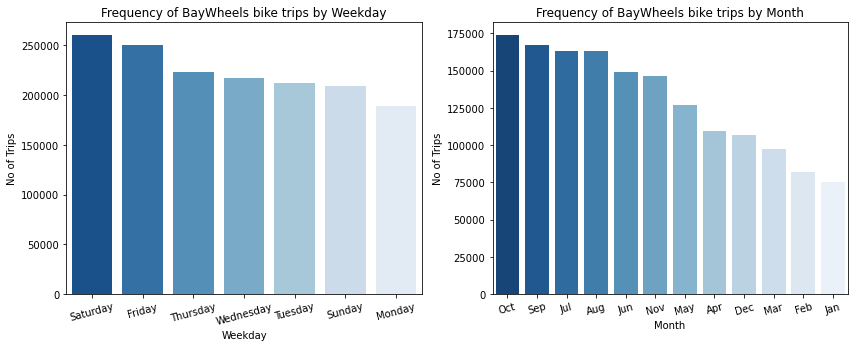

In [35]:
# When trips are most taken (Baywheels)

plt.figure(figsize = [14, 5])
bay_week_order = baywheels_clean['weekday'].value_counts().index
bay_month_order = baywheels_clean['month'].value_counts().index

plt.subplot(1, 2, 1)
sb.countplot(data = baywheels_clean, x = 'weekday', order = bay_week_order, palette = 'Blues_r')
plt.xticks(rotation = 15)
plt.xlabel('Weekday')
plt.ylabel('No of Trips')
plt.title('Frequency of BayWheels bike trips by Weekday');

plt.subplot(1, 2, 2)
sb.countplot(data = baywheels_clean, x = 'month', order = bay_month_order, palette = 'Blues_r')
plt.xticks(rotation = 15)
plt.xlabel('Month')
plt.ylabel('No of Trips')
plt.title('Frequency of BayWheels bike trips by Month');


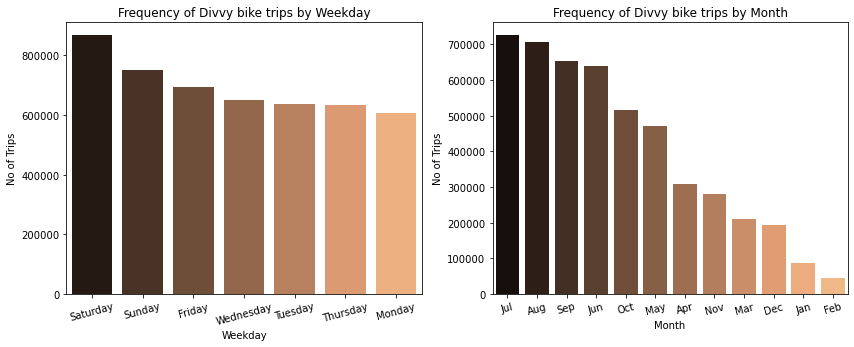

In [36]:
# When trips are most taken (Divvy)

plt.figure(figsize = [14, 5])

bay_week_order = baywheels_clean['weekday'].value_counts().index
bay_month_order = baywheels_clean['month'].value_counts().index
div_week_order = divvy_clean['weekday'].value_counts().index
div_month_order = divvy_clean['month'].value_counts().index

plt.subplot(1, 2, 1)
sb.countplot(data = divvy_clean, x = 'weekday', order = div_week_order, palette = 'copper')
plt.xticks(rotation = 15)
plt.xlabel('Weekday')
plt.ylabel('No of Trips')
plt.title('Frequency of Divvy bike trips by Weekday');

plt.subplot(1, 2, 2)
sb.countplot(data = divvy_clean, x = 'month', order = div_month_order, palette = 'copper')
plt.xticks(rotation = 15)
plt.xlabel('Month')
plt.ylabel('No of Trips')
plt.title('Frequency of Divvy bike trips by Month');

#### Observation

From the charts above, we can see the frequency of bike trips by week and month in the year 2021 for both bike sharing comapnies. Most bike trips are taken on during the weekends (*Saturdays, Sundays and Fridays*) for both Baywheels and Divvy Bike Sharing Systems. <br>
For the months in 2021, most bike trips for Baywheels in the year 2021 are taken in October, September and July respectively. 
The least bike trips are taken in January, February and March. 
Similary, for Divvy bike sharing system, most bike trips were taken in July, August and September.<br>
These patterns are kind of expected because, these months fall in the Summer & Spring seasons. Biking might prove more difficult during the winter and as such, the low number of biketrips we see in the months assocciated with winter.<br>

### Question

How long does the average trip take?


#### Visualization

For this, I would like to view the average trip based on;
>- Average trip per week,
>- Average trip per month,
>- Average trip per user type, and
>- Average trip per bik share status

In [37]:
# Average duration of bike trip in seconds (Baywheels)

mean_dur = round(baywheels_clean.duration_sec.mean(), 2)
print("Average duration of bike trip in seconds is:", mean_dur,"secs")

Average duration of bike trip in seconds is: 1145.9 secs


In [38]:
# preparing the data to display average duration (Baywheels)

bay_avg_weekly = baywheels_clean.groupby('weekday', as_index = False)['duration_sec'].mean().sort_values('duration_sec', ascending = True)
bay_avg_monthly = baywheels_clean.groupby('month', as_index = False)['duration_sec'].mean().sort_values('duration_sec', ascending = True)
bay_avg_user = baywheels_clean.groupby('member_casual', as_index = False)['duration_sec'].mean().sort_values('duration_sec', ascending = True)
bay_avg_share = baywheels_clean.groupby('rideable_type', as_index = False)['duration_sec'].mean().sort_values('duration_sec', ascending = True)

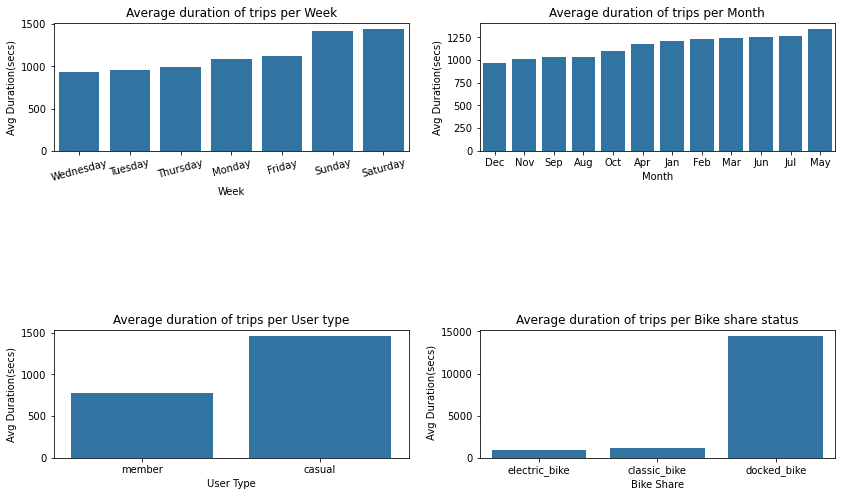

In [39]:
plt.figure(figsize = [14, 8])

plt.subplot(3, 2, 1)
sb.barplot(data = bay_avg_weekly, x = 'weekday', y = 'duration_sec', color = sb.color_palette()[0])
plt.xlabel('Week')
plt.ylabel('Avg Duration(secs)')
plt.xticks(rotation = 15)
plt.title('Average duration of trips per Week');

plt.subplot(3, 2, 2)
sb.barplot(data = bay_avg_monthly, x = 'month', y = 'duration_sec', color = sb.color_palette()[0])
plt.xlabel('Month')
plt.ylabel('Avg Duration(secs)')
plt.title('Average duration of trips per Month');

plt.subplot(3, 2, 5)
sb.barplot(data = bay_avg_user, x = 'member_casual', y = 'duration_sec', color = sb.color_palette()[0])
plt.xlabel('User Type')
plt.ylabel('Avg Duration(secs)')
plt.title('Average duration of trips per User type');

plt.subplot(3, 2, 6)
sb.barplot(data = bay_avg_share, x = 'rideable_type', y = 'duration_sec', color = sb.color_palette()[0])
plt.xlabel('Bike Share')
plt.ylabel(' Avg Duration(secs)')
plt.title('Average duration of trips per Bike share status');

#### Observation (Baywheels)

The average duration in seconds of bike trips last for about 1,145.9 seconds, The plots as displayed above gives some insight into how long the bike trips last for each day within the week and each month within the year for both datasets. Similar to our previous observation where weekends have the highest frequency of trips within the week, here we can see that longer trips are taken during the weekends (Saturday and Sunday).<br>
So also, longer trips are taken July, June and May, this might be attributed to the weather conditions during these periods as these months fall within the summer and spring seasons.<br>
Oddly enough, the casual customers seem to take longer trips than the subscribed members. With the casual customers having an average of about 1400secs and the members having 675secs, One would have expected the members to take longer trips than the casual customers since they have a subscription to the service.<br>
Finally, Docked bikes have the highest duration of trips compared to electric and classic bikes. This is surprising as we saw earlier that the docked bikes have the least number of trips in both datasets; this suggests that docked bikes were used for the longer trips in 2021 for Baywheels bike sharing system <br>

In [40]:
# Average duration of bike trip in seconds (Divvy)

mean_dur = round(divvy_clean.duration_sec.mean(), 2)
print("Average duration of bike trip in seconds is:", mean_dur,"secs")

Average duration of bike trip in seconds is: 1386.73 secs


In [41]:
# preparing the data to display average duration (Divvy)

divvy_avg_weekly = divvy_clean.groupby('weekday', as_index = False)['duration_sec'].mean().sort_values('duration_sec', ascending = True)
divvy_avg_monthly = divvy_clean.groupby('month', as_index = False)['duration_sec'].mean().sort_values('duration_sec', ascending = True)
divvy_avg_user = divvy_clean.groupby('member_casual', as_index = False)['duration_sec'].mean().sort_values('duration_sec', ascending = True)
divvy_avg_share = divvy_clean.groupby('rideable_type', as_index = False)['duration_sec'].mean().sort_values('duration_sec', ascending = True)

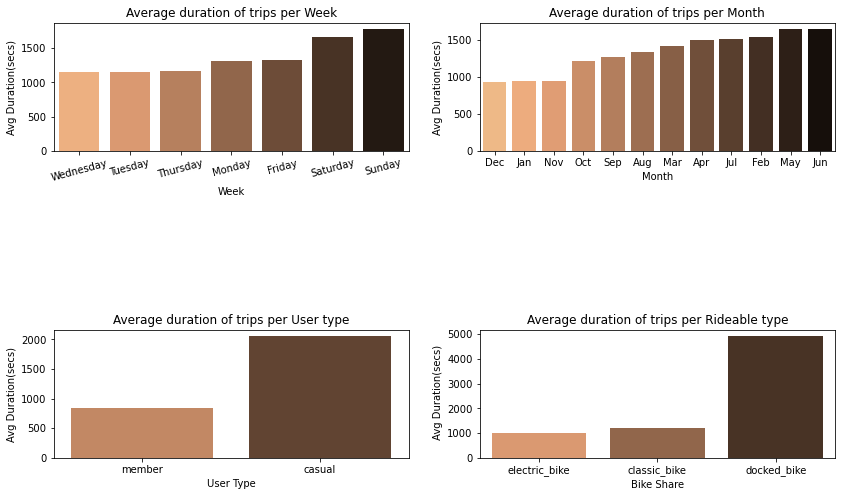

In [42]:
plt.figure(figsize = [14, 8])

plt.subplot(3, 2, 1)
sb.barplot(data = divvy_avg_weekly, x = 'weekday', y = 'duration_sec', palette = 'copper_r')
plt.xlabel('Week')
plt.ylabel('Avg Duration(secs)')
plt.xticks(rotation = 15)
plt.title('Average duration of trips per Week');

plt.subplot(3, 2, 2)
sb.barplot(data = divvy_avg_monthly, x = 'month', y = 'duration_sec', palette = 'copper_r')
plt.xlabel('Month')
plt.ylabel('Avg Duration(secs)')
plt.title('Average duration of trips per Month');

plt.subplot(3, 2, 5)
sb.barplot(data = divvy_avg_user, x = 'member_casual', y = 'duration_sec', palette = 'copper_r')
plt.xlabel('User Type')
plt.ylabel('Avg Duration(secs)')
plt.title('Average duration of trips per User type');

plt.subplot(3, 2, 6)
sb.barplot(data = divvy_avg_share, x = 'rideable_type', y = 'duration_sec', palette = 'copper_r')
plt.xlabel('Bike Share')
plt.ylabel(' Avg Duration(secs)')
plt.title('Average duration of trips per Rideable type');

#### Observation (Divvy)

The findings for average duration of trips for the Divvy dataset is very similar to that found in the Baywheels dataset.
>- Longer bike trips are taken during the weekends,
>- May, Jun and July have are the months with the longest bike trips,
>- Causual customers take longer bike trips and,
>- Similar to Baywheels Data, in Divvy bike share system, Docked bikes also have the highest average duration of trips. We could say that the longest bike trips were taken with docked bikes in 2021 athough they only had a few of these long bike trips .

One thing is clear, the trend or features of trips for customers in both bike sharing companies are similar.

#### Question

What time of the day are most bike trips taken?

#### Visualization
The **'hour'** column earlier created will be useful here.

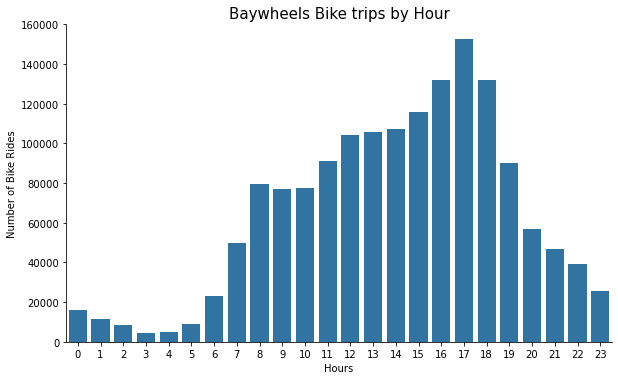

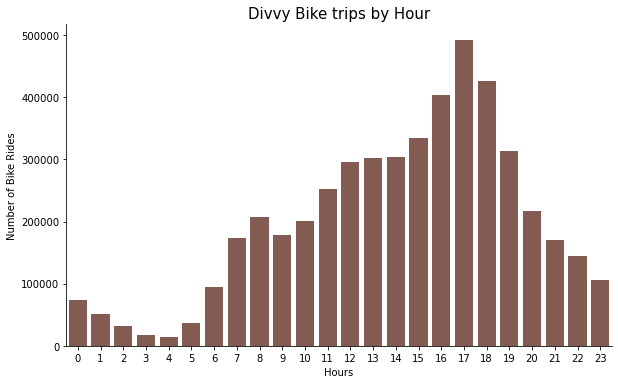

In [43]:
# Bike trips by hour - Baywheels
sb.catplot(data = baywheels_clean, x='hour', kind='count', color = sb.color_palette()[0], aspect = 1.7)
plt.xlabel('Hours') 
plt.ylabel('Number of Bike Rides')
plt.title('Baywheels Bike trips by Hour', size = 15);


# Bike trips by hour - Divvy
plot = sb.catplot(data = divvy_clean, x='hour', kind='count', color = sb.color_palette()[5], aspect = 1.7)
plt.xlabel('Hours') 
plt.ylabel('Number of Bike Rides')
plt.title('Divvy Bike trips by Hour', size = 15);

#### Observation

Surprisingly, most bike rides are are taken in the evenings; 5pm, 6pm and 4pm. I would have expected a spike in the morning and evenings however, this data suggests that the more bike trips do evening rides than at any other time of day. 
This trend is the exact same thing for the dataset of both Divvy and Baywheels Bike systems.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration(sec) had records with a large range of values, as a result, I looked at the data using a log transform. With this log transformation, the data looked unimodal with the peaks between 300 and 500 seconds in both datasets. <br>
> The distance(km) also had records with large range of values and when I looked at this data, I first used a log transform and then further looked at both datasets using smaller logbin sizes. I also had to remove 0km distances for a cleaner view.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Upon exploring the distance and duration size variables, a number of outlier points were identified. To have a better view of the distribution of the data, all of these points were removed from the dataset (e.g a few records with duration over 24 hours and rides less than 60 seconds). These were removed so as to get a clearer view at the distributions as more of the dataset sits in a low range of values.

#### Question

Which stations are the most popular stations?

#### Visualization

For this exploration, we will be looking at the top 10 stations in both bike sharing systems.

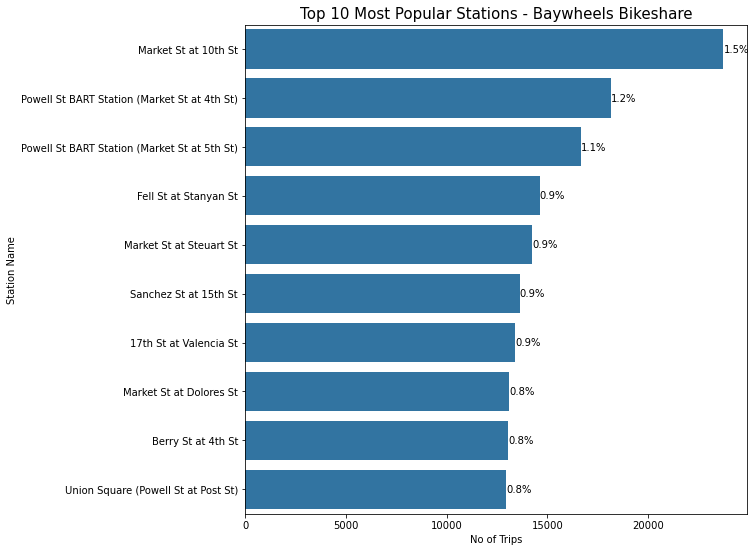

In [44]:
# Baywheels Bikeshare System - Top 10 most popular Start station
plt.figure(figsize = [9, 9])

order = baywheels_clean.start_station_name.value_counts().head(10).index
sb.countplot(data = baywheels_clean , y = 'start_station_name' ,  color = sb.color_palette()[0] , order = order)
plt.title('Top 10 Most Popular Stations - Baywheels Bikeshare', size = 15)
plt.ylabel('Station Name')
plt.xlabel('No of Trips');

# adding percentage  
counts = baywheels_clean.start_station_name.value_counts().head(10)
for i in range(counts.shape[0]):
  count = counts[i]
  percent = '{:0.1f}%'.format(100*count/baywheels_clean.shape[0])
  plt.text(count+1, i, percent, va = 'center');

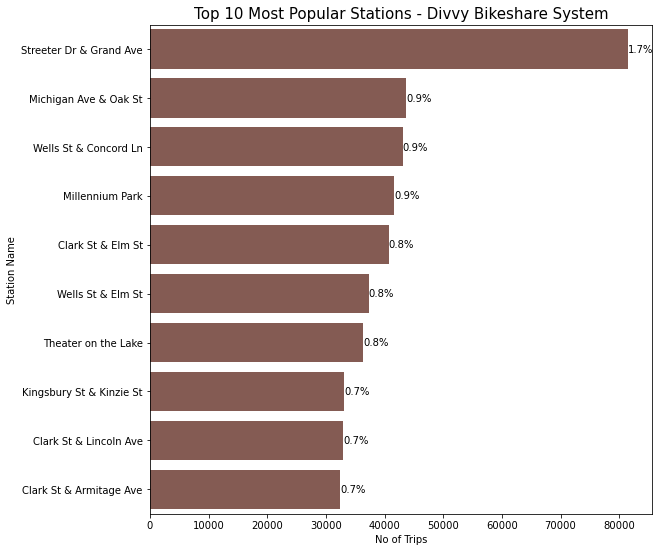

In [45]:
# Divvy Bikeshare System - Top 10 Most popular Start station
plt.figure(figsize = [9, 9])

order = divvy_clean.start_station_name.value_counts().head(10).index
sb.countplot(data = divvy_clean , y = 'start_station_name' ,  color = sb.color_palette()[5] , order = order)
plt.title('Top 10 Most Popular Stations - Divvy Bikeshare System', size = 15)
plt.ylabel('Station Name')
plt.xlabel('No of Trips');

# adding percentage  
counts_d = divvy_clean.start_station_name.value_counts().head(10)
for i in range(counts_d.shape[0]):
  count = counts_d[i]
  percent = '{:0.1f}%'.format(100*count/divvy_clean.shape[0])
  plt.text(count+1, i, percent, va = 'center');

#### Observation

The Most Popular station of the Baywheels Bike share system (**_Market St at 10th St_**) as seen from the chart above is a major thoroughfare (A thoroughfare is a primary passage or way as a transit route through regularly trafficked areas, whether by road on dry land or, by extension, via watercraft or aircraft) in San Francisco Carlifornia and a major transit artery for the city of San Francisco. The high traffic of bike trips seen in this area could be attributed to this characteristic feature of the area.

The Most Popular popular station of the Divvy Bike share system (**_Streeter Dr & Grand Ave_**) is located in the heart of Chicago. Grand Avenue is a major east-west street in Chicago. It runs for about a distance of 31km through the western subrurbs and magnificient shpping area. It is serviced by many CTA (Chicago Transit Authority) Lines. The high traffic of bike trips in this area could be attributed to the characteristic feature of this area.

## Bivariate Exploration

#### Question

Compare the distribution of distance in km based on the user_type category and rideable type.

#### Visualization
Here I made another copy of the dataset to work with, some modifications had to be done to the dataset such as removing outliers in order to have a good and insightful visual.

In [46]:
# Baywheels - creating a copy of the dataset and changing user type datatype to category
baywheels_d = baywheels_clean.copy()
user_classes = ['member', 'casual']
userclasses = pd.api.types.CategoricalDtype(ordered=True, categories = user_classes)
baywheels_d['member_casual'] = baywheels_d['member_casual'].astype(userclasses);

In [47]:
## removing identified outliers
dist_over10 = baywheels_d['distance_km'] > 10
#print(baywheels_d.loc[dist_over10,['start_lat', 'end_lat', 'distance_km']])

There are a some trips with distance over 10km. The average distance in km is about 2km. Knowing this I decided to check the dataset and I realised we have 527 trips with distance greater than 10km.
Removing these outliers shows a clearer distribution of values in the violin plot. This is because a majority of bike trips fall between 1 and 2km. See plot below.

In [48]:
baywheels_d = baywheels_d.loc[-dist_over10,:]

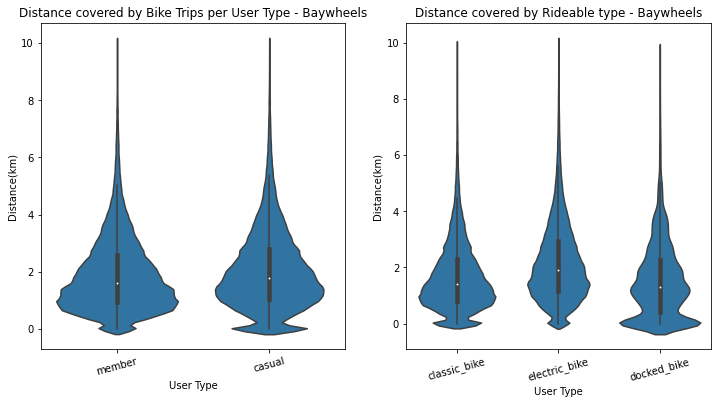

In [49]:
plt.figure(figsize = [12, 6])

plt.subplot(1, 2, 1)
sb.violinplot(data = baywheels_d, x = 'member_casual', y = 'distance_km', color = sb.color_palette()[0])
plt.xticks(rotation=15)
plt.title('Distance covered by Bike Trips per User Type - Baywheels')
plt.xlabel('User Type')
plt.ylabel('Distance(km)');

plt.subplot(1, 2, 2)
sb.violinplot(data = baywheels_d, x = 'rideable_type', y = 'distance_km', color = sb.color_palette()[0])
plt.xticks(rotation=15)
plt.title('Distance covered by Rideable type - Baywheels')
plt.xlabel('User Type')
plt.ylabel('Distance(km)');


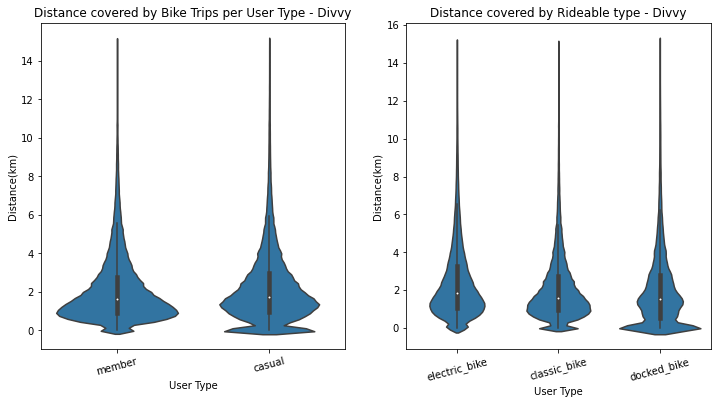

In [50]:
# Divvy- creating a copy of the dataset and changing user type datatype to category
divvy_d = divvy_clean.copy()
user_classes = ['member', 'casual']
userclasses = pd.api.types.CategoricalDtype(ordered=True, categories = user_classes)
divvy_d['member_casual'] = divvy_d['member_casual'].astype(userclasses);

## removing identified outliers
dist_over15 = divvy_d['distance_km'] > 15
divvy_d = divvy_d.loc[-dist_over15,:]

# plotting divvy
plt.figure(figsize = [12, 6])

plt.subplot(1, 2, 1)
sb.violinplot(data = divvy_d, x = 'member_casual', y = 'distance_km', color = sb.color_palette()[0])
plt.xticks(rotation=15)
plt.title('Distance covered by Bike Trips per User Type - Divvy')
plt.xlabel('User Type')
plt.ylabel('Distance(km)');

plt.subplot(1, 2, 2)
sb.violinplot(data = divvy_d, x = 'rideable_type', y = 'distance_km', color = sb.color_palette()[0])
plt.xticks(rotation=15)
plt.title('Distance covered by Rideable type - Divvy')
plt.xlabel('User Type')
plt.ylabel('Distance(km)');

#### Observation

As expected from the findings in the dataset, the distance between the start station and the end station (or docking station as I like to call it) fall between around 0.5km and 1.5km in both datasets. There is no much difference in the distribution for subscribers and casual customers based on the distance covered on their bike trips. The distance covered by the customer does not really depend on if they are a casual customer or subscribed (member) customer.

#### Question 

Is there a correlation between distance in km and duration in seconds?

#### Visualization

Here I will use a correlation plot to determine if there are any correlations between Distance(km) and Duration(sec) for both Datasets.

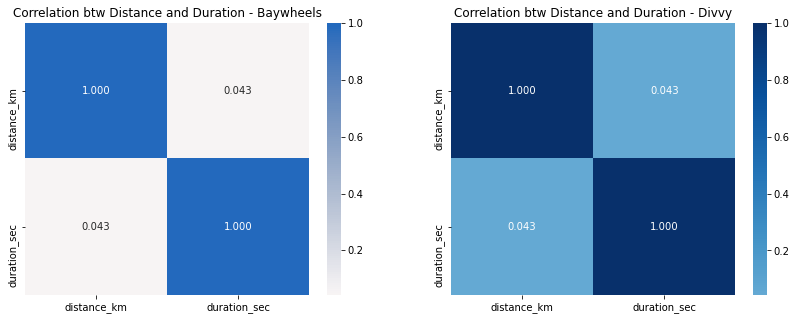

In [51]:
# Baywheels

numeric_vars = ['distance_km', 'duration_sec']
plt.figure(figsize = [14, 5])

plt.subplot(1, 2, 1)
sb.heatmap(baywheels_clean[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title('Correlation btw Distance and Duration - Baywheels');


plt.subplot(1, 2, 2)
sb.heatmap(divvy_clean[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'Blues', center = 0)
plt.title('Correlation btw Distance and Duration - Divvy');

<ipython-input-52-8bd7ae33a932>:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 15000])
<ipython-input-52-8bd7ae33a932>:22: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 15000])


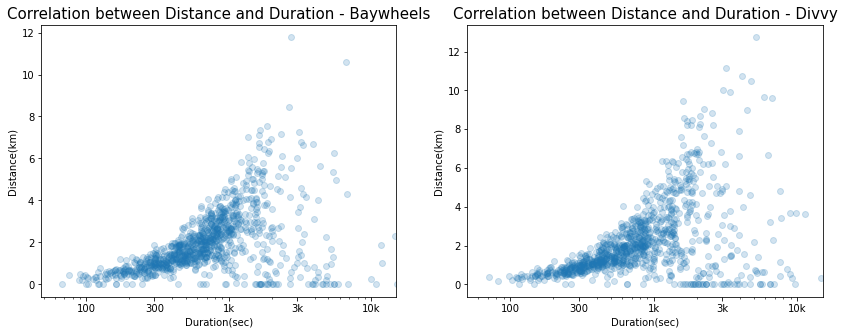

In [52]:
#checking for correlation between duration_sec and distance_km using scatter plot, using a sample size 1000 from the dataset
baywheels_samp = baywheels_clean.sample(n = 1000, replace = False)
divvy_samp = divvy_clean.sample(n = 1000, replace = False)


plt.figure(figsize = [14, 5])

plt.subplot(1, 2, 1)
plt.scatter(data = baywheels_samp, x = 'duration_sec', y = 'distance_km', alpha = 1/5)
plt.xscale('log')
plt.xticks([100, 300, 1000, 3000, 10000, 80000], [100, 300, '1k', '3k','10k', '80k'])
plt.xlim([0, 15000])
plt.xlabel('Duration(sec)')
plt.ylabel('Distance(km)')
plt.title('Correlation between Distance and Duration - Baywheels', size = 15);


plt.subplot(1, 2, 2)
plt.scatter(data = divvy_samp, x = 'duration_sec', y = 'distance_km', alpha = 1/5)
plt.xscale('log')
plt.xticks([100, 300, 1000, 3000, 10000, 80000], [100, 300, '1k', '3k','10k', '80k'])
plt.xlim([0, 15000])
plt.xlabel('Duration(sec)')
plt.ylabel('Distance(km)')
plt.title('Correlation between Distance and Duration - Divvy', size = 15);
            
            

#### Observation

Looking at the heatmap correlation plots for both Datasets, correlation between distance and duration is about 0.04 in both cases. This is a very low positive correlation that might suggest that there are no strong correlations between both variables in both datasets. Checking a sample of the dataset with a scatter plot shows a somewhat positive correlation; although weak as established by the correlation plot. This plot does not necessarily suggest that bike trips with longer duration mean longer distances.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I was curious about the correlation between Duration and distance. However, from the investigation, I could see that there is a very weak positive correlation between the two variables.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Although there were no relationships between the distance of the bike trip and the user type, we could see a relationship between the distance covered and the weekdays, same also for the duration. The longer trips are taken on the weekends and also the most number of trips are taken on the weekends as expected.

## Multivariate Exploration

> There are a lot of datapoints in the datasets and as a result, I would be using a sample size of 1000 to explore relationships between the numerical variables and some of the categorical variables.

#### Question


#### Visualization

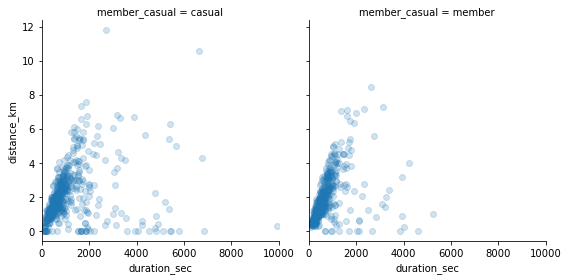

In [53]:
# Baywheels Bike sharing system

bay_g = sb.FacetGrid(data = baywheels_samp, col = 'member_casual', height = 4, xlim = [0, 10000])
bay_g.map(plt.scatter, 'duration_sec', 'distance_km', alpha = 1/5);

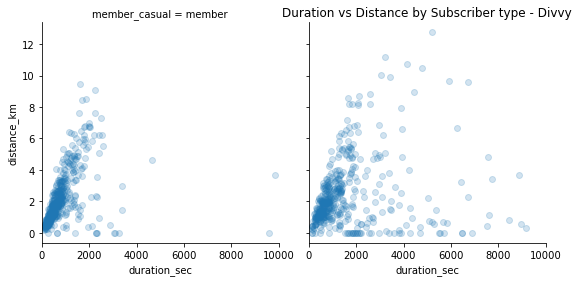

In [54]:
# Divvy Bike sharing system

divvy_g = sb.FacetGrid(data = divvy_samp, col = 'member_casual', height = 4, xlim = [0, 10000])
divvy_g.map(plt.scatter, 'duration_sec', 'distance_km', alpha = 1/5)
plt.title('Duration vs Distance by Subscriber type - Divvy');

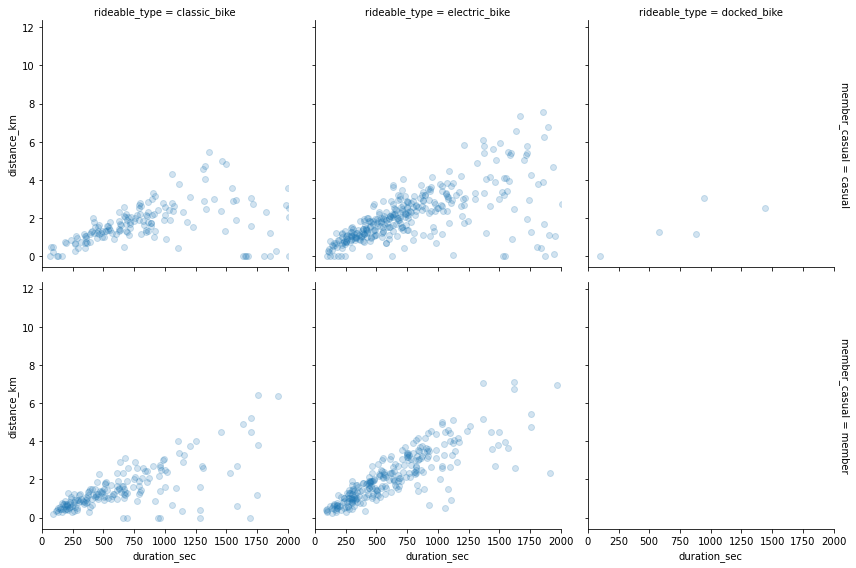

In [55]:
# Divvy Bike sharing system

y = sb.FacetGrid(data = baywheels_samp, col = 'rideable_type', row = 'member_casual', 
                 height = 4, margin_titles = True, xlim = [0, 2000])
y.map(plt.scatter, 'duration_sec', 'distance_km', alpha = 1/5);

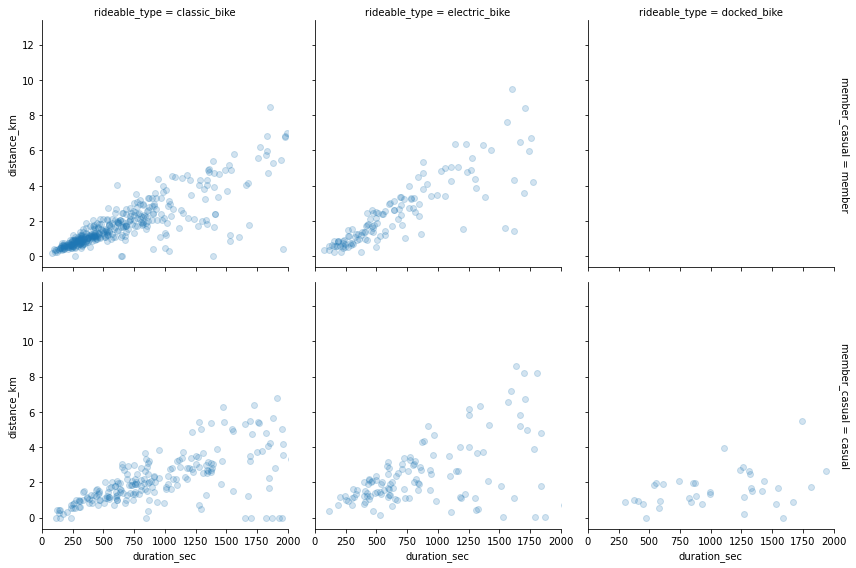

In [56]:
# Divvy Bike sharing system

x = sb.FacetGrid(data = divvy_samp, col = 'rideable_type', row = 'member_casual', 
                 height = 4, margin_titles = True, xlim = [0, 2000])
x.map(plt.scatter, 'duration_sec', 'distance_km', alpha = 1/5);

#### Observation

Looking at the relationships between distance and duration by rideable type shows the same weak correlations accross all the bike types. Similar to our previous findings, there is no plot for distance vs duration for members that ride docked bikes because there are no records of subscribed members using docked bikes. Electric bike and Classic bikes seem to be the most preferred by the members.

#### Question

Is there a relationship between the day of week and the bike type?

#### Visualization

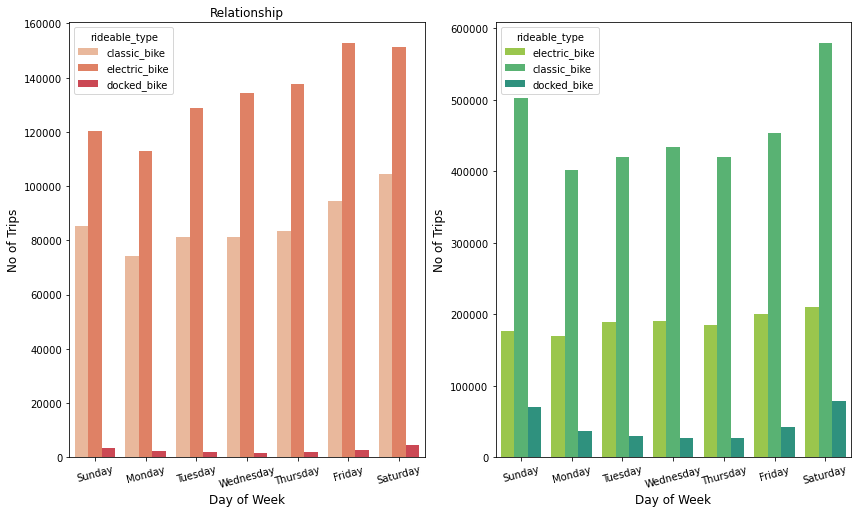

In [57]:
# Baywheels

order = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.figure(figsize = [14, 8])

plt.subplot(1, 2, 1)
sb.countplot(data = baywheels_clean, x = 'weekday', hue = 'rideable_type', 
             palette = sb.color_palette('rocket_r'), order = order)
plt.ylabel('No of Trips', size = 12)
plt.xlabel('Day of Week', size = 12)
plt.title('Relationship')
plt.xticks(rotation = 15);

plt.subplot(1, 2, 2)
sb.countplot(data = divvy_clean, x = 'weekday', hue = 'rideable_type', 
             palette = sb.color_palette('viridis_r'), order = order)
plt.ylabel('No of Trips', size = 12)
plt.xlabel('Day of Week', size = 12)
plt.title('')
plt.xticks(rotation = 15);

#### Observation

The charts above, show that the type of bike used for each trip is not dependent on day of week, there is no relationship between the two categoric variables but we see that more trips are taken with the electric bikes for Baywheels bikeshare system and classic bikes for Divvy bikeshare system as earlier established.
There is a possible fact that the type of bike could influence the number of trips in both bike sharing systems. This finding might open up opportunities for the bike sharing systems to make available the most preferred bike types to encourage more bike trips.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> This part of my exploration clearly showed how weak the relationship between distance and duration really is. And this was the case for both bike sharing systems.

### Were there any interesting or surprising interactions between features?

> There are no interesting or surprising interactions between features. No relationships were found between the day of week and bike type as the distribution was similar for each day. However, the frequency of bikes seem to be influenced by bike type from the chart above.

## Conclusions

> Exploring the data for Baywheels and Divvy Bike sharing systems took us on a journey. We observed that although there are more records of Bike trips in the Divvy bike sharing system of Chicago than Baywheels bike sharing system of San Francisco Bay Area, the trends and findings are very similar in most cases. The bike trips and behavior of the customers are similar in both cases.<br>

> There were some outliers (such as data points with very high values in terms of duration and distance covered); a majority of the data sits between the 1 - 1.5 km for distance and 300 - 500 seconds for duration of bike trips. 
In both bike sharing systems, there are more trips taken by casual customers than the members i.e subscribed customers. One would expect this to be the other way round. I believe a deep dive into Pricing models and Customer Profiling strategy should be revealuated. If most bike trips are taken by casual customers, there is potential here to convert these casual customers to subscribed members which will be a lot more profitable to the bike sharing systems. Also a survey could be done to drill down to why the customers prefer casual rides to a subscription based ride type.<br>

> It was not surprising when explorations from both datasets showed that there are a lot more trips taken on weekends and even that the longer trips are taken on weekends. Similarly for both datasets, the most bike trips are taken in months May, June and July, and this is quite relatable because these months fall into Spring/Summer seasons, bike trips would be more favorable and safe during these periods compared to Winter.<br>

> Finally, there were no strong or specific relationships between most of the variables. The correlation observed between distance and duration was a weak correlation and does not necessarily suggest that either variable affects the other.
The bike type seem to be a factor that influences the bike trips, we could see some type of relationships between Number of bike trips and bike types. Most of the trips are taken using the **elcetric** bike type for Baywheels bike share system however for Divvy Bike share system, the mostly used bike type is the **classic** bike. Asides from the variance in number of bike trips between the two systems, this is another difference that was observed; further analysis will be required to understand the features of both bikes and how they influence the customer choice of bike rides in the different cities.. <br>

#### Limitations.

There are so much more variables I believe could be useful to analyzing these datasets. Unfortunately these informations were not provided. Informations about the customer such as age, gender and occupation would have been very useful. Also price points for the bike trip either per duration or bike type would have been very useful too. These information can be used to further understand what factors influence a customer behavior in relation to their bike trips.



#### References
>- https://www.carrentalgateway.com/glossary/bike-sharing-system/#:~:text=Bike%2Dsharing%20system%20is%20a,world%2C%20mostly%20based%20in%20cities.
>- https://towardsdatascience.com/heres-how-to-calculate-distance-between-2-geolocations-in-python-93ecab5bbba4
>- https://towardsdatascience.com/calculating-distance-between-two-geolocations-in-python-26ad3afe287b
>- https://datascientyst.com/convert-month-number-to-month-name-pandas-dataframe/
>- https://pynative.com/python-get-the-day-of-week/#:~:text=isoweekday()%20to%20get%20a%20weekday%20of%20a%20given%20date%20in%20Python,-The%20weekday()&text=Use%20the%20isoweekday()%20method,in%20place%20of%20weekday()%20.&text=The%20output%20is%201%2C%20which,Monday%20as%20Monday%20is%201.
>- https://stackoverflow.com/questions/15411158/pandas-countdistinct-equivalent
>-https://en.wikipedia.org/wiki/Thoroughfare
>-https://en.wikipedia.org/wiki/Oak_Street_(Chicago)
>- https://tools4dev.org/resources/how-to-choose-a-sample-size/#:~:text=A%20good%20maximum%20sample%20size%20is%20usually%20around%2010%25%20of,the%20maximum%20would%20be%201000.